## Coding project about English language proficiency in relation to GDP per capita

Christian: This here is my analysis of the two countries Denmark and Argentina, and their individual relationships between english language proficiency and GDP per capita.
For this analysis I will use GDP data from Ourworld, as well as language proficiency data from the organisation EF.
I've attempted to look complete most of my code from previous classwork or looking it up on sites such as Stackoverflow.com, 
although AI has been used in assisting me whenever I've gotten stuck.

In [1]:
install.packages('dplyr') # for functions
install.packages('ggplot2') # for plotting

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
# activating installed packages for analysis 
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
# Fetch the GDP data
df <- read.csv("https://ourworldindata.org/grapher/gdp-per-capita-worldbank.csv?v=1&csvType=full&useColumnShortNames=true")

# read in CEFR data

dk_cefr <- read.delim('Data/Denmark_CEFR.csv', sep = ";")
arg_cefr <- read.delim("Data/Argentina_CEFR.csv", sep = ";")

# Filter GDP data to relevant countries
dk_gdp <- df %>% 
    filter(Entity=="Denmark")
arg_gdp <- df %>%
    filter(Entity=="Argentina")

In [9]:
arg_data <- merge(arg_gdp, arg_cefr, all = TRUE)
dk_data <- merge(dk_gdp, dk_cefr, all = TRUE)
country_analysis <- merge(arg_data, dk_data, all = TRUE)
country_nona = country_analysis %>%
    na.exclude(country_analysis)

In [13]:
# Merging GDP and CEFR datasets for both ARG and DK
arg_data <- merge(arg_gdp, arg_cefr, all = TRUE)
dk_data <- merge(dk_gdp, dk_cefr, all = TRUE)
arg_data
# Making filtered datasets with no null values for the sake of analysis
arg_nona = arg_data %>%
    na.exclude(arg_data)
dk_nona = dk_data %>%
    na.exclude(dk_data)

In [5]:
# Doing the same null-value exclusion here to make more visually pleasing plots
country_nona = country_analysis %>%
    na.exclude(country_analysis)
country_nona

,Year,Entity,Code,ny_gdp_pcap_pp_kd,CEFR
,<int>,<chr>,<chr>,<dbl>,<int>
43,2011,Argentina,ARG,24647.63,508
44,2011,Denmark,DNK,51293.21,611
45,2012,Argentina,ARG,24118.87,518
46,2012,Denmark,DNK,51216.31,626
47,2013,Argentina,ARG,24424.14,524
48,2013,Denmark,DNK,51479.27,621
49,2014,Argentina,ARG,23550.10,563
50,2014,Denmark,DNK,52048.34,641
51,2015,Argentina,ARG,23933.89,568


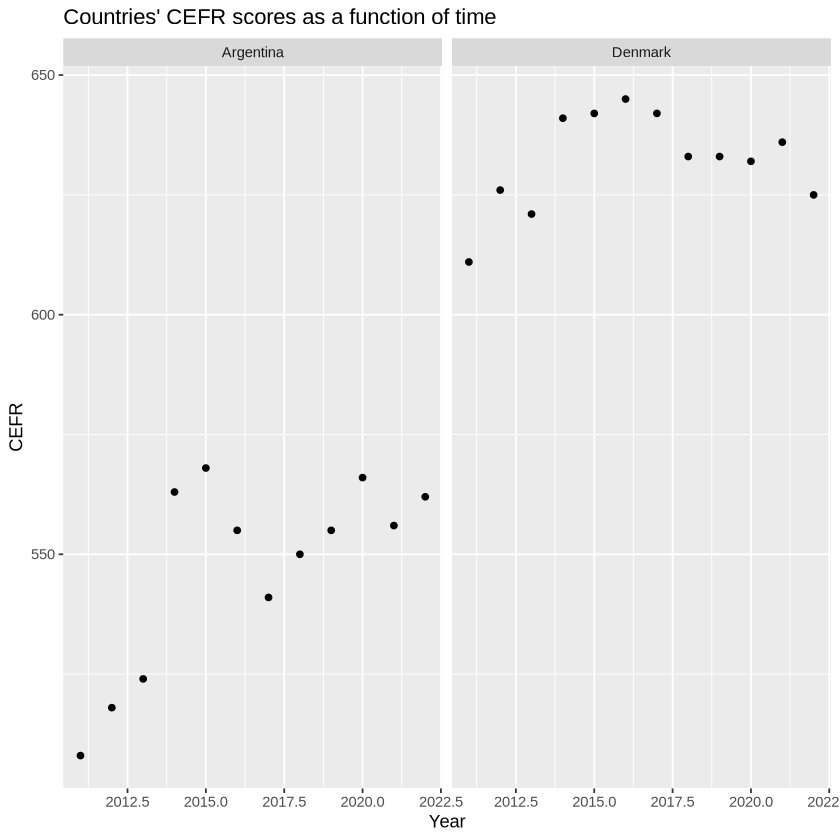

In [11]:
# Plotting CEFR-levels' yearly evolution in Argentina and Denmark
ggplot(country_nona,
      aes(x = Year,
         y = CEFR)) +
    geom_point() +
    facet_wrap( ~Entity) +
    labs(title = "Countries' CEFR scores as a function of time",
         x = "Year",
         y = "CEFR")

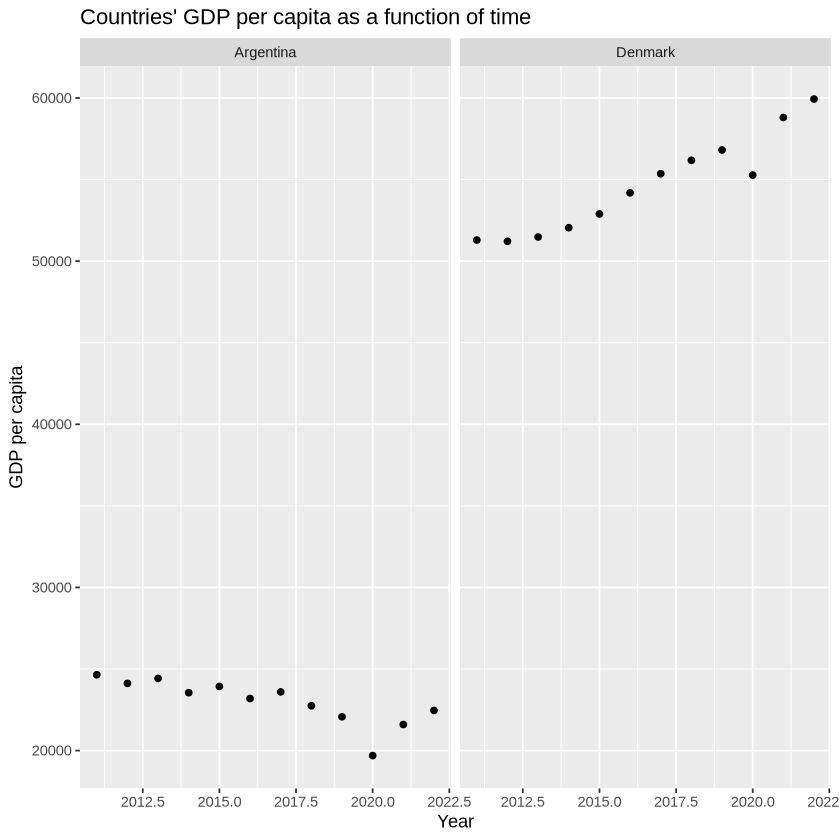

In [12]:
# Plotting GDP per capita in USD of Argentina and Denmark
ggplot(country_nona,
      aes(x = Year,
         y = ny_gdp_pcap_pp_kd)) +
    geom_point() +
    facet_wrap( ~Entity) +
    labs(title = "Countries' GDP per capita as a function of time",
         x = "Year",
         y = "GDP per capita")

In [23]:
# Making correlation test  between Argentina's GDP and CEFR-levels
cor.test(arg_nona$ny_gdp_pcap_pp_kd,arg_nona$CEFR)


	Pearson's product-moment correlation

data:  arg_data$ny_gdp_pcap_pp_kd and arg_data$CEFR
t = -2.5581, df = 10, p-value = 0.02846
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.88382244 -0.08611277
sample estimates:
       cor 
-0.6289324 



	Pearson's product-moment correlation

data:  arg_nona$ny_gdp_pcap_pp_kd and arg_nona$CEFR
t = -2.5581, df = 10, p-value = 0.02846
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.88382244 -0.08611277
sample estimates:
       cor 
-0.6289324 


In [24]:
# Making correlation test between Denmark's GDP and CEFR-levels
cor.test(dk_nona$ny_gdp_pcap_pp_kd, dk_nona$CEFR)


	Pearson's product-moment correlation

data:  dk_data$ny_gdp_pcap_pp_kd and dk_data$CEFR
t = 0.68561, df = 10, p-value = 0.5085
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4121305  0.7005948
sample estimates:
      cor 
0.2118872 



	Pearson's product-moment correlation

data:  dk_nona$ny_gdp_pcap_pp_kd and dk_nona$CEFR
t = 0.68561, df = 10, p-value = 0.5085
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4121305  0.7005948
sample estimates:
      cor 
0.2118872 


Denmark's and Argentina's t-tests have different conclusions. In Denmark's case there is no correlation between GD per capita and CEFR scores. 
In Argentina's case, however, there is a neative correlation, meaning that the higher the GDP per, the lower Argentinians score on the CEFR scale, which is very curious.